In [ ]:
#Bibliotecas padrones para trabalhar com dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
files.upload("cluster_shimada.xlsx")

In [ ]:
dados = pd.read_excel("cluster_shimada.xlsx") # Basta tirar o # e mudar o nome da base de dados para o nome do arquivo :)

In [ ]:
# Esse código limpa a base de dados removendo espaços indesejados que aparecem na importação
for j in range(0, len(dados.columns)):
  for i in range(0, len(dados)):
    dados[dados.columns[j]][i] = str(dados[dados.columns[j]][i]).replace("\n", "")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Primeiro coloque as opções de resposta dentro dessa lista em aspas
# Eu indicaria copiar cada uma do Excel para o Python para ficar exatamente igual a não dar erro
# Esse código coloca em uma tabela todas as respostas desse tipo
list = ["Concordo totalmente", "Concordo parcialmente", "Nem concordo, nem discordo", "Discordo parcialmente", "Discordo totalmente"] # Deve manter a ordem
x = []

for i in dados.columns:
  if dados[i][1] in list:
    x.append(i)
x
df = dados[x]

In [ ]:
# Esse código substitui o que está em list para 5, 4, 3, 2, 1 respectivamente
for j in range(0, len(df.columns)):
  for i in range(0, len(df)):
    df[df.columns[j]][i] = df[df.columns[j]][i].replace(list[0], "5").replace(list[1], "4").replace(list[2], "3").replace(list[3], "2").replace(list[4], "1")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
for i in range(0, len(df.columns)):
  df[df.columns[i]] = pd.to_numeric(df[df.columns[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Importar o algoritmo de inteligencia artificial
from sklearn.cluster import KMeans

In [ ]:
# Aqui iremos criar um intervalo do número de cluster desejados
# Não recomendo um número hiper alto, em geral não iremos trabalhar com 
# mais que 4 clusters por fins estatísticos

wcss = []
min_cluster = 1
max_cluster = 8
r = range(min_cluster,max_cluster + 1)

<function matplotlib.pyplot.show>

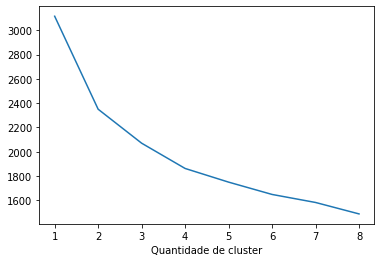

In [ ]:
#Aqui iremos testar para encontrar um número ideal de clusters

for k in r:
  KM = KMeans(n_clusters = k, init = "k-means++")
  KM.fit(df)
  wcss.append(KM.inertia_)

plt.plot(r,wcss)
plt.xlabel("Quantidade de cluster")
plt.show # Isso mostra a distância ao quadrado até o centróide mais próximo conforme a quantidade de clusters

In [ ]:
# Essa é a quantidade ideal de clusters, escolhemos com base no menor decaimento de distância do gráfico
# Se decair muito pouco ou o número de cluster for muito alto sem diminuir muito a distância, o número ideal é 1 (não há clusters)
diff = []
for i in range(0, len(wcss)-1):
  diff.append(wcss[i]-wcss[i+1])
n = diff.index(max(diff)) + 2
n

2

In [ ]:
# Criando nossa AI
AI = KMeans(n_clusters = n)

In [ ]:
#Agora vamos rodar a AI nos dados
AI.fit(df)

KMeans(n_clusters=2)

In [ ]:
# Agora vamos simplesmente calcular o cluster onde cada dado se encontra
y = AI.predict(df)

In [ ]:
#Adicionar clusters ao df
dados["Cluster"] = y + 1
df["Cluster"] = y + 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df["Cluster"].value_counts()

1    76
2    74
Name: Cluster, dtype: int64

In [ ]:
# Agora, transforma a base para um Excel e ele vai aparecer em arquivos na esquerda do Colab
# Primeiro você vai no arquivo, clica nos três pontinhos e depois vai em Download
dados.to_excel("cluster.xlsx")

In [ ]:
# Essa é a quantidade de gráficos que você deve fazer
len(x)

12

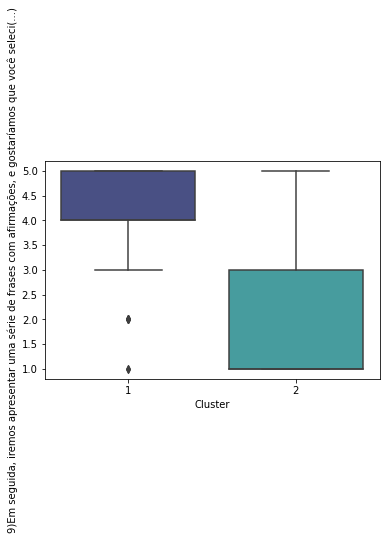

In [ ]:
# Agora basta plotar 13 gráficos de x[0] até x[11] acrescentando códigos e salvar
sns.boxplot(data = df, x = "Cluster", y = x[0], palette = 'mako')

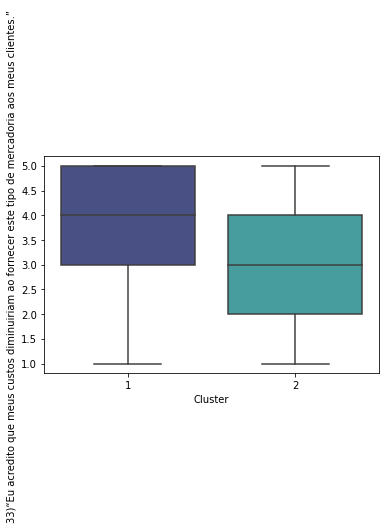

In [ ]:
sns.boxplot(data = df, x = "Cluster", y = x[11], palette = 'mako')